In [1]:
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

# from giskard.plot import adjplot, scattermap
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.plot import networkplot
from graspologic.layouts import layout_umap, layout_tsne
from graspologic.utils import is_fully_connected, largest_connected_component, symmetrize
from matplotlib.patheffects import Normal, Stroke

"""
from pkg.data import (
    load_maggot_graph,
    load_network_palette,
    load_node_palette,
    load_unmatched,
)
"""
# from pkg.io import get_environment_variables
# from pkg.io import glue as default_glue
# from pkg.io import savefig
# from pkg.plot import set_theme
from pkg.platy import (
    load_0_adj_orig,
    load_1_adj_orig,
    load_2_adj_orig,
    load_3_adj_orig,
    load_left_adj_orig,
    load_right_adj_orig,
    load_head_adj_orig,
    load_pygidium_adj_orig,
    load_0_adj,
    load_1_adj,
    load_2_adj,
    load_3_adj,
    load_head_adj,
    load_pygidium_adj,
    load_left_adj,
    load_right_adj,
    load_0_adj_labels_with_class,
    load_1_adj_labels_with_class_v2,
    load_2_adj_labels_with_class_v2,
    load_3_adj_labels_with_class_v2,
    load_head_adj_labels_with_class_v2,
    load_pygidium_adj_labels_with_class_v2,
    load_left_adj_labels_with_class_v2,
    load_right_adj_labels_with_class_v2,
    load_connectome_annotations,
    load_connectome_normal_lcc_annotations_v2,
    load_connectome_normal_lcc_annotations_v3,
)
from scipy.cluster import hierarchy
from umap import UMAP

rng = np.random.default_rng(8888)

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        skids   side    class   segment   type  group
0     2015233   left  sensory      head  100.0    NaN
1     1548290   left   muscle         1    NaN    NaN
2     1318919   left  sensory      head   88.0   15.0
3     2015241   left  sensory      head  100.0    NaN
4     1769485  right  sensory       NaN    NaN    NaN
...       ...    ...      ...       ...    ...    ...
2028  1597423  right   muscle  pygidium    NaN    NaN
2029  1302513   left  sensory      head    NaN    NaN
2030  1671147  right    motor         1  165.0    NaN
2031  1376251   left    inter      head    NaN    NaN
2032  1048573   left    inter         3    NaN    NaN

[2033 rows x 6 columns]


In [3]:
# load the adjs
left_adj = load_left_adj()
right_adj = load_right_adj()
head_adj = load_head_adj()
pyg_adj = load_pygidium_adj()
adj_0 = load_0_adj()
adj_1 = load_1_adj()
adj_2 = load_2_adj()
adj_3 = load_3_adj()

orig_adjs = [left_adj, right_adj, head_adj, pyg_adj, adj_1, adj_2, adj_3]

In [4]:
#nx adjs
nx_adjs = []
for adj in orig_adjs:
    nx_adjs.append(nx.from_pandas_adjacency(adj))

#np adjs
np_adjs = []
for adj in orig_adjs:
    np_adjs.append(adj.to_numpy())

#lccs for both
nx_lcc_adjs = []
for adj in nx_adjs:
    nx_lcc_adjs.append((largest_connected_component(adj)))

np_lcc_adjs = []
for adj in np_adjs:
    np_lcc_adjs.append((largest_connected_component(adj)))


In [5]:
ase = AdjacencySpectralEmbed(n_components=24, check_lcc=False, concat=True)
ase_adjs = []
for adj in np_lcc_adjs:
    ase_adjs.append(ase.fit_transform(adj))

In [6]:
umapper = UMAP(n_components=2, n_neighbors=64, min_dist=0.8, metric="cosine", random_state=rng.integers(np.iinfo(np.int32).max))
umap_embed = []
for i, adj in enumerate(ase_adjs):
    umap_embedding = umapper.fit_transform(adj)
    umap_embed.append(umap_embedding)

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [7]:
#use layout_umap from graspologic

#USE PASS TO RANKS FROM GRASPOLOGIC
all_x = []
all_y = []
all_degrees = []
all_hues = []

for i, adj in enumerate(nx_lcc_adjs):
    X, node_pos = layout_tsne(adj, perplexity=1, n_iter=10000)
    x_pos = []
    y_pos = []
    node_comms = []
    for pos in node_pos:

        #save the assigned community of the node
        node_comms.append(pos[4])
        x_pos.append(pos[1])
        y_pos.append(pos[2])

    node_comms = np.array(node_comms)
    x_pos = np.array(x_pos)
    y_pos = np.array(y_pos)
    degrees = [val for (node, val) in adj.degree()]

    all_x.append(x_pos)
    all_y.append(y_pos)
    all_degrees.append(degrees)
    all_hues.append(node_comms)


/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/U

In [8]:
#adj_0, _ = load_0_adj_labels()
#nx_0 = nx.from_pandas_adjacency(adj_0)
#X_0, node_pos_0 = layout_tsne(nx_0, perplexity=1,  n_iter=10000)

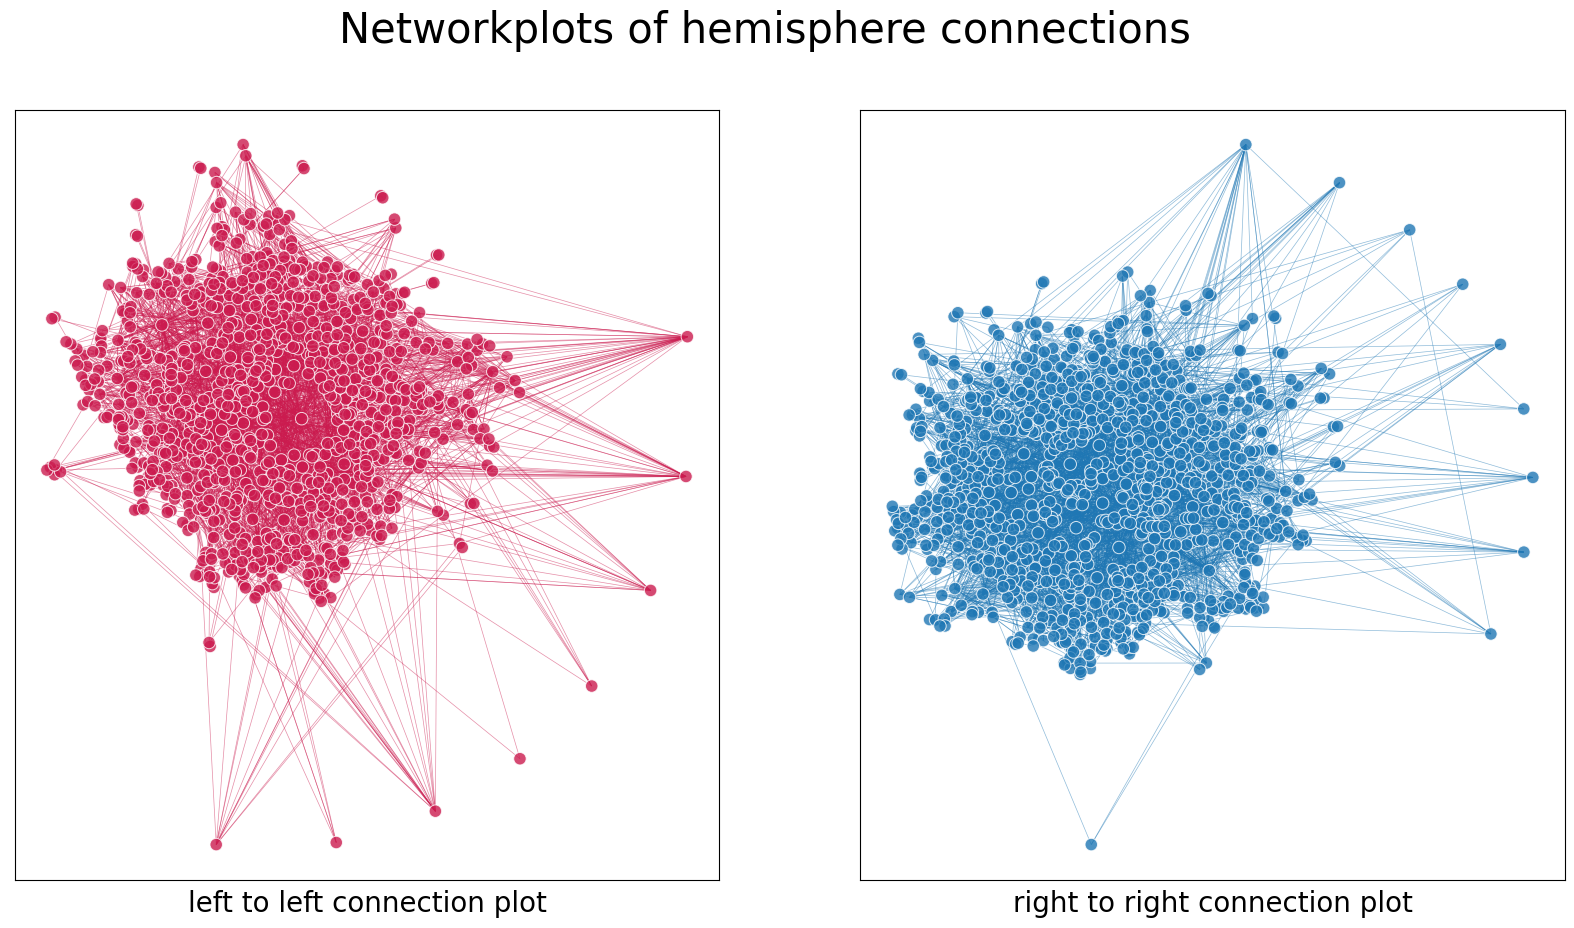

In [9]:
#hemis
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
hemi_adjs = np_lcc_adjs[0:2]
hemi_x = all_x[0:2]
hemi_y = all_y[0:2]
hemi_hues = ["rocket", "tab20"]
hemi_names = ["left", "right"]
for i in range(len(hemi_adjs)):

    node_hues = []
    for j in range(len(hemi_adjs[i])):
        node_hues.append(0)

    node_hues = np.array(node_hues)

    plot = networkplot(
        adjacency=hemi_adjs[i],
        x=hemi_x[i],
        y=hemi_y[i],
        node_hue = node_hues,
        palette=hemi_hues[i],
        node_sizes=(15, 100),
        edge_hue="source",
        edge_alpha=0.5,
        edge_linewidth=0.5,
        ax = axs[i]
    )

    axs[i].set(xlabel="{} to {} connection plot".format(hemi_names[i], hemi_names[i]))
    axs[i].xaxis.label.set_size(20)
    fig.suptitle("Networkplots of hemisphere connections", fontsize=30)

#rocket, cubehelix, tab20, dark:salmon_r, YlOrBr, icefire, seagreen, viridis, magma

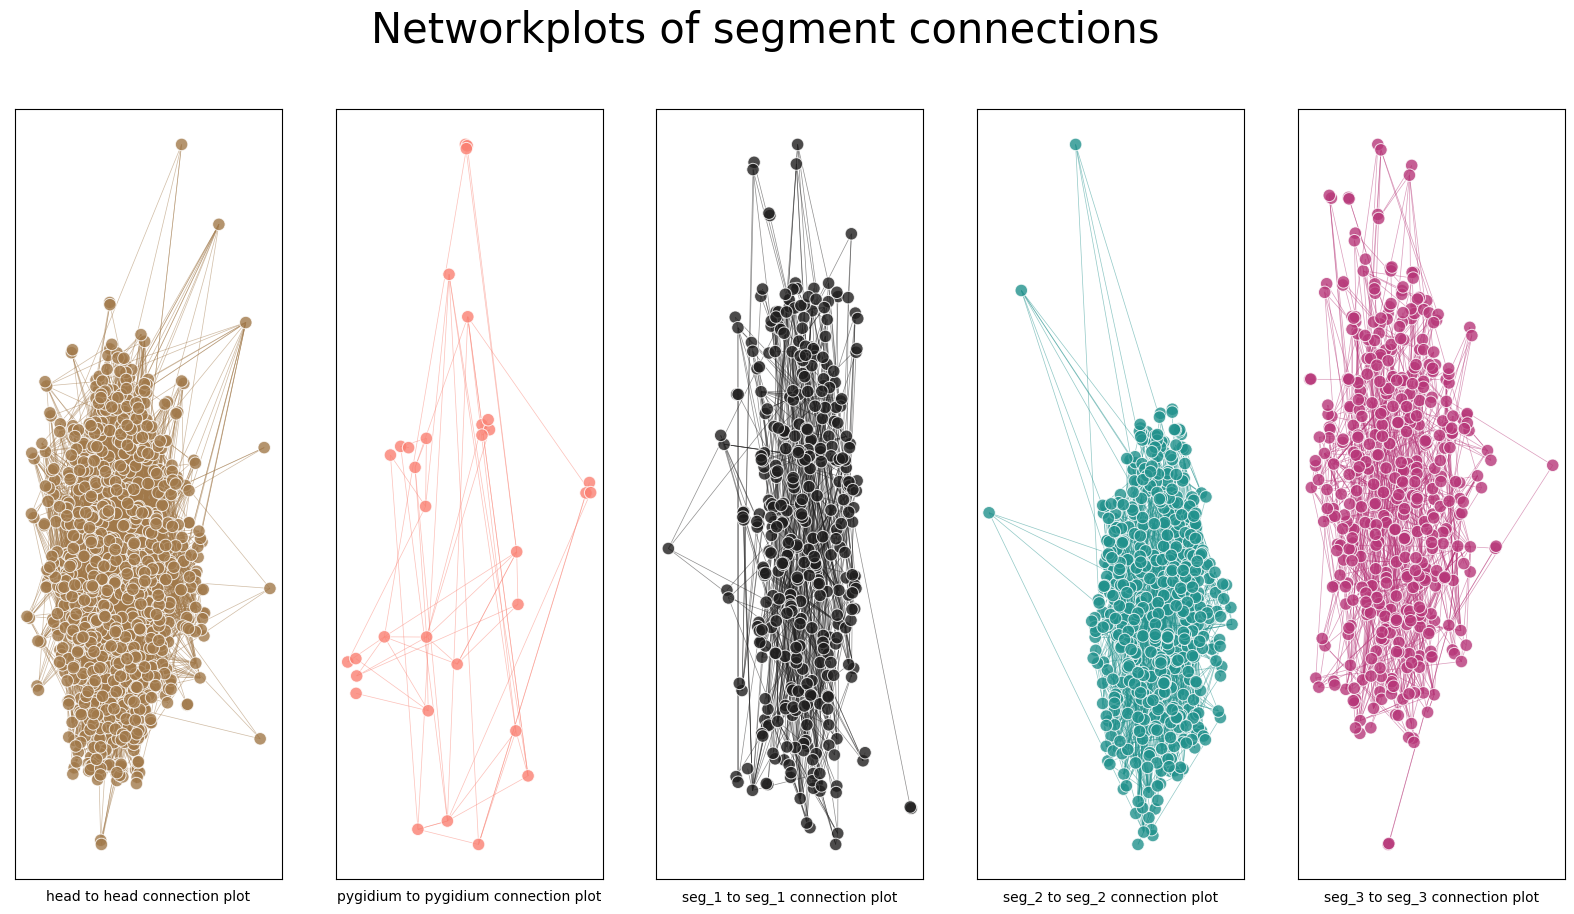

In [10]:
#segs
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
seg_adjs = np_lcc_adjs[2:]
seg_x = all_x[2:]
seg_y = all_y[2:]
seg_hues = ["cubehelix", "dark:salmon_r", "icefire", "viridis", "magma"]
seg_names = ["head", "pygidium", "seg_1", "seg_2", "seg_3"]
for i in range(len(seg_adjs)):

    node_hues = []
    for j in range(len(seg_adjs[i])):
        node_hues.append(0)

    node_hues = np.array(node_hues)

    plot = networkplot(
        adjacency=seg_adjs[i],
        x=seg_x[i],
        y=seg_y[i],
        node_hue = node_hues,
        palette=seg_hues[i],
        node_sizes=(15, 100),
        edge_hue="source",
        edge_alpha=0.5,
        edge_linewidth=0.5,
        ax = axs[i]
    )

    axs[i].set(xlabel="{} to {} connection plot".format(seg_names[i], seg_names[i]))
    axs[i].xaxis.label.set_size(10)
    fig.suptitle("Networkplots of segment connections", fontsize=30)

#rocket, cubehelix, tab20, dark:salmon_r, YlOrBr, icefire, seagreen, viridis, magma

get updated data from catmaid
run lcc version of hemis/segs adjs for all tests done so far
make sure figs are nice (publishable ready)
make sure notebooks are nice too
follow show_data.py notebook to plot adjs
- make both fig 1a and 1b
- embed first
- for segments, generalize to case with 5-6 comparisons: 5-6 blocks in adj (keep 0 or not)
- one fig for hemis, one for segs
    - play around with layouts
- read bgm paper
- integrate nadine's pair data
- take subgraphs with pairs and try running one of graph matching techniques: gives predicted pairing; evaluate matching accuracy
    - which method should we use
- use her pairs as seeds and predict remainder (remainder is nodes that aren't given as pairs)

In [2]:
def gen_disc(mat_orig, mat_with_class):
    mat_orig_index = mat_orig.index
    mat_with_class_index = mat_with_class.index

    disc = []
    for i in range(len(mat_orig_index)):
        if mat_orig_index[i] not in mat_with_class_index:
            disc.append(mat_orig_index[i])
    
    return disc

In [7]:
left_adj = load_left_adj_orig()
left_adj_class, _ = load_left_adj_labels_with_class_v2()

right_adj = load_right_adj_orig()
right_adj_class, _ = load_right_adj_labels_with_class_v2()

head_adj = load_head_adj_orig()
head_adj_class, _ = load_head_adj_labels_with_class_v2()

pyg_adj = load_pygidium_adj_orig()
pyg_adj_class, _ = load_pygidium_adj_labels_with_class_v2()

seg1_adj = load_1_adj_orig()
seg1_adj_class, _ = load_1_adj_labels_with_class_v2()

seg2_adj = load_2_adj_orig()
seg2_adj_class, _ = load_2_adj_labels_with_class_v2()

seg3_adj = load_3_adj_orig()
seg3_adj_class, _ = load_3_adj_labels_with_class_v2()

orig_adjs = [left_adj, right_adj, head_adj, pyg_adj, seg1_adj, seg2_adj, seg3_adj]
class_adjs = [left_adj_class, right_adj_class, head_adj_class, pyg_adj_class, seg1_adj_class, seg2_adj_class, seg3_adj_class]
names = ["left", "right", "head", "pygidium", "segment 1", "segment 2", "segment 3"]

discs = []
for i in range(len(orig_adjs)):
    disc = gen_disc(orig_adjs[i], class_adjs[i])
    discs.append(disc)

for i in range(len(discs)):
    print("{}: {}".format(names[i],len(discs[i])))

for i in range(len(orig_adjs)):
    print("orig: {}, with class: {}".format(len(orig_adjs[i]), len(class_adjs[i])))


left: 85
right: 70
head: 24
pygidium: 2
segment 1: 40
segment 2: 40
segment 3: 35
orig: 1052, with class: 967
orig: 989, with class: 919
orig: 748, with class: 724
orig: 81, with class: 79
orig: 357, with class: 317
orig: 435, with class: 395
orig: 358, with class: 323


In [8]:
discs_np = np.array(discs)
discs_1d = np.hstack(discs_np)
len(discs_1d)
print(type(discs[0][0]))
discs_1d

<class 'str'>


/var/folders/25/jsfr4z_n287567y95vp2zgn40000gn/T/ipykernel_80941/1874198686.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  discs_np = np.array(discs)


array(['1564703', '1433691', '1433701', '1827286', '1303054', '1294885',
       '1294966', '1950381', '1484007', '1336580', '2008501', '1517020',
       '1476102', '1640084', '1656520', '1656524', '1591058', '1673139',
       '1533917', '2000882', '2000911', '1386544', '1419394', '1567054',
       '1739164', '1329618', '1386964', '1427971', '1632907', '273055',
       '1338017', '1379252', '1387597', '1650135', '1404382', '1478193',
       '1388085', '1920579', '1445460', '1617521', '1306246', '1379998',
       '1609407', '1453826', '1363722', '1224471', '1363909', '1847405',
       '774258', '1446136', '1585416', '1405317', '1446384', '1282992',
       '1643440', '1282998', '1659941', '2028656', '1455247', '505193',
       '800116', '1849210', '1341318', '1333136', '1275812', '1333316',
       '1726596', '1333656', '1243776', '1440477', '2013923', '1383209',
       '1514371', '1817849', '1744166', '1744183', '1383745', '1416527',
       '1605150', '1416768', '1343057', '1433269', '133

In [5]:
import pymaid
import logging
rm = pymaid.CatmaidInstance(
    server="https://catmaid.jekelylab.ex.ac.uk/#",
    project_id=11,
    api_token=None,
    http_user=None,
    http_password=None,
)
logging.getLogger("pymaid").setLevel(logging.WARNING)
pymaid.clear_cache()

count = 0
print(type(discs_1d[0]))
for i in range(len(discs_1d)):
    annots = pymaid.get_annotations(discs_1d[i])
    if "pigment cell" in list(annots[discs_1d[i]]):
        count += 1

count


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


<class 'numpy.str_'>


33

In [29]:
annots_v3 = load_connectome_normal_lcc_annotations_v3()
poss_annots = ["sensory", "inter", "motor", "epithelia", "muscle", "ciliated", "gland"]
skids_connec_class = []
skids_connec = []
for i in range(len(annots_v3)):
    skids_connec.append(annots_v3.loc[i, "skids"])
    if annots_v3["class"][i] in poss_annots:
        skids_connec_class.append(annots_v3["skids"][i])

print(len(skids_connec))
print(len(skids_connec_class))
annots_v3

2033
1907


,skids,side,class,segment,type,group
0,2015233,left,sensory,head,100.0,NaN
1,1548290,left,muscle,1,NaN,NaN
2,1318919,left,sensory,head,88.0,15.0
3,2015241,left,sensory,head,100.0,NaN
4,1769485,right,sensory,NaN,NaN,NaN
...,...,...,...,...,...,...
2028,1597423,right,muscle,pygidium,NaN,NaN
2029,1302513,left,sensory,head,NaN,NaN
2030,1671147,right,motor,1,165.0,NaN
2031,1376251,left,inter,head,NaN,NaN


In [11]:
count = 0
for i in range(len(annots_v3)):
    annot_list = pymaid.get_annotations(annots_v3.loc[i, "skids"])
    if "gland cell" in list(annot_list[str(annots_v3.loc[i, "skids"])]):
        count += 1
count

18

In [24]:
count = 0
for i in range(len(annots_v3)):
    annot_list = pymaid.get_annotations(annots_v3.loc[i, "skids"])
    if "pigment cell" in list(annot_list[str(annots_v3.loc[i, "skids"])]):
        count += 1
count

24

In [106]:
#make skids_connec a string
for i in range(len(skids_connec)):
    skids_connec[i] = str(skids_connec[i])

In [57]:
import pymaid
import logging
rm = pymaid.CatmaidInstance(
    server="https://catmaid.jekelylab.ex.ac.uk/#",
    project_id=11,
    api_token=None,
    http_user=None,
    http_password=None,
)
logging.getLogger("pymaid").setLevel(logging.WARNING)
pymaid.clear_cache()
left_annots = pymaid.get_annotations(list(discs)[1][15])
annot = pymaid.get_annotations(list(left_adj_class.index)[26])
annot

{'57553': ['lasso circuit',
  'left',
  'episphere',
  'with_soma',
  'connectome_old_set',
  'connectome_with_soma',
  'premotor',
  'connectome',
  'IN_head_visualisation_small',
  'connectome_interneuron',
  'head IN lateral neuropil',
  'central head IN cluster',
  'left_side',
  'connectome_neuron',
  'IN_head_visualisation',
  'RGWpresyn',
  'clear synaptic vesicles',
  'piece_eyecircuit',
  'ectoderm',
  'piece 350712-RRT',
  'celltype',
  'schnörkel_interneuron',
  'RGWa-possible',
  'celltype57',
  'head',
  'interneuron',
  'eye_circuit',
  'dense cored vesicles',
  'connectome_1042_cells_Jasek_et_al',
  'Randel_et_al_2015',
  'central_brain',
  'nr unpaired',
  'nr dense core vesicles',
  'connectome_old_set2',
  'connectome_neuron_left',
  'nr connectome_neuron',
  'nr connectome_interneuron']}

In [28]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "gland cell"], intersect=True)
len(connectome_len)

18

In [13]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "muscle_cell", "ciliated cell"], intersect=True)
len(connectome_len)

0

In [27]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "effector", "muscle_cell"], intersect=True)
len(connectome_len)

332

In [23]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "pigment cell", "epithelia_cell"], intersect=True)
len(connectome_len)

7

In [29]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "effector"], intersect=True)
len(connectome_len)

462

In [14]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "effector", "ciliated cell"], intersect=True)
len(connectome_len)

75

In [37]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "segment_1", "pigment cell"], intersect=True)
len(connectome_len)

0

In [15]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "effector", "epithelia_cell"], intersect=True)
len(connectome_len)

7

In [16]:
connectome_len = pymaid.get_skids_by_annotation(["connectome", "asymmetric neuron"], intersect=True)
len(connectome_len)

13

In [41]:
connectome_frag = pymaid.get_skids_by_annotation(["connectome", "Sensory neuron", "gland cell"], intersect=True)
print(len(connectome_frag))
np.intersect1d(connectome_frag, skids_connec)

0


array([], dtype=float64)

In [12]:
connectome_frag = pymaid.get_skids_by_annotation(["connectome", "pigment cell"], intersect=True)
print(len(connectome_frag))

24


In [139]:
connec_orig_frag = []
for i in range(len(skids_connec)):
    try:
        annots = pymaid.get_annotations(skids_connec[i])
        print("{}: {}".format(i, skids_connec[i]))
        if "fragmentum" in list(annots[skids_connec[i]]):
            connec_orig_frag.append(skids_connec[i])
    except:
        continue

2015233
0: 2015233
1548290
1: 1548290
1318919
2: 1318919
2015241
3: 2015241
1646603
4: 1646603
1769485
5: 1769485
1318929
6: 1318929
1622033
7: 1622033
1318938
8: 1318938
1064990
9: 1064990
1564703
10: 1564703
1441826
11: 1441826
1466405
12: 1466405
1728550
13: 1728550
1671212
14: 1671212
1417265
15: 1417265
1728563
16: 1728563
1318965
17: 1318965
1278006
18: 1278006
1466424
19: 1466424
1458234
20: 1458234
1417276
21: 1417276
1564732
22: 1564732
1507391
23: 1507391
1294400
24: 1294400
1671231
25: 1671231
1065030
26: 1065030
1318986
27: 1318986
1294413
28: 1294413
1441872
29: 1441872
1327186
30: 1327186
24659
31: 24659
1957973
32: 1957973
1278038
33: 1278038
1130583
34: 1130583
1433691
35: 1433691
1376350
36: 1376350
1024095
37: 1024095
1278051
38: 1278051
1359971
39: 1359971
1392742
40: 1392742
1392754
41: 1392754
1359987
42: 1359987
385141
43: 385141
827510
44: 827510
1065083
45: 1065083
1646725
46: 1646725
1335430
47: 1335430
1302663
48: 1302663
2007173
49: 2007173
786570
50: 786570


In [172]:
len(connec_orig_frag)

21

In [144]:
annots_v3 = annots_v2.set_index("skids")
annots_v3

,side,class,segment,type,group
skids,,,,,
2015233,left,sensory,head,100.0,NaN
1548290,left,muscle,1,NaN,NaN
1318919,left,sensory,head,88.0,15.0
2015241,left,sensory,head,100.0,NaN
1646603,right,NaN,3,NaN,NaN
...,...,...,...,...,...
1302513,left,sensory,head,NaN,NaN
1630186,left,muscle,2,NaN,NaN
1441779,right,epithelia,head,NaN,NaN


In [147]:
annots_v3["is_fragmentum"] = False
annots_v3

,side,class,segment,type,group,is_fragmentum
skids,,,,,,
2015233,left,sensory,head,100.0,NaN,False
1548290,left,muscle,1,NaN,NaN,False
1318919,left,sensory,head,88.0,15.0,False
2015241,left,sensory,head,100.0,NaN,False
1646603,right,NaN,3,NaN,NaN,False
...,...,...,...,...,...,...
1302513,left,sensory,head,NaN,NaN,False
1630186,left,muscle,2,NaN,NaN,False
1441779,right,epithelia,head,NaN,NaN,False


In [153]:
connectome_frag = np.array(connec_orig_frag, dtype=int)
intersect = annots_v3.index.intersection(connectome_frag)
annots_v3.loc[intersect, "is_fragmentum"] = True
annots_v3.loc[1319057]

side              left
class            inter
segment           head
type               NaN
group              NaN
is_fragmentum     True
Name: 1319057, dtype: object

In [161]:
annots_v3

,side,class,segment,type,group,is_fragmentum
skids,,,,,,
2015233,left,sensory,head,100.0,NaN,False
1548290,left,muscle,1,NaN,NaN,False
1318919,left,sensory,head,88.0,15.0,False
2015241,left,sensory,head,100.0,NaN,False
1646603,right,NaN,3,NaN,NaN,False
...,...,...,...,...,...,...
1302513,left,sensory,head,NaN,NaN,False
1630186,left,muscle,2,NaN,NaN,False
1441779,right,epithelia,head,NaN,NaN,False


In [168]:
#find how many neurons remain if you remove fragmentum neurons and neurons that have a label
poss_annots = ["sensory", "inter", "motor", "epithelia", "muscle", "ciliated"]
skids = annots_v3.index
skids_connec_no_class = []
for i in range(len(annots_v3)):
    if annots_v3.loc[skids[i], "class"] not in poss_annots:
        skids_connec_no_class.append(skids[i])

skids_connec_no_class_no_frag = []
#find neurons with fragmentum label
for i in range(len(skids_connec_no_class)):
    if annots_v3.loc[skids_connec_no_class[i], "is_fragmentum"] == False:
        skids_connec_no_class_no_frag.append(skids_connec_no_class[i])



In [169]:
print(len(skids_connec_no_class))
print(len(skids_connec_no_class_no_frag))

266
262


See how many neurons remain if you remove fragmentum neurons and neurons that have a label

Figure out why fragmentum connectome neurons are not in table of connectome neurons